In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, pearsonr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

'Id' is just id index. Columns 'Alley', 'PoolQC', 'Fence', and 'MiscFeature' contain few non-null values. And about half of the values of 'FireplaceQu' are missed. Solet's just drop them.

In [10]:
df = df.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
zero_cols = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

percentage_zeros = (df[zero_cols] == 0).mean() * 100
zero = pd.DataFrame({'Percentage_of_zeros': np.round(percentage_zeros, 2)})
zero

,Percentage_of_zeros
EnclosedPorch,85.75
3SsnPorch,98.36
ScreenPorch,92.05
PoolArea,99.52
MiscVal,96.44


In [13]:
df = df.drop(columns=['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'])

In [14]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000


In [15]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 70, dtype: int64

Filling missing values...

In [16]:
num_df = df.select_dtypes(include='number')
num_cols = num_df.columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

str_df = df.select_dtypes(include='object')
str_cols = str_df.columns

for col in str_cols:
    df[col] = df[col].fillna(df[col].value_counts().idxmax())

Let's take a look at the distribution of targert.

<Axes: xlabel='SalePrice', ylabel='Count'>

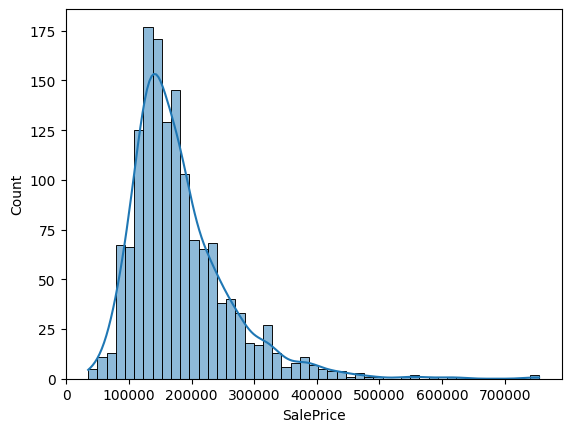

In [17]:
sns.histplot(data = df, x ='SalePrice', kde=True)

Skewed! Let's fix it.

<Axes: xlabel='SalePrice', ylabel='Count'>

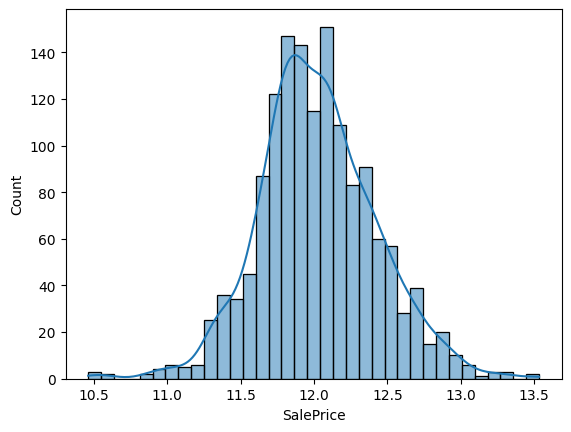

In [18]:
df['SalePrice'] = np.log(df['SalePrice'])
sns.histplot(data = df, x ='SalePrice', kde=True)

### About 'MSSubClass'

<Axes: xlabel='MSSubClass', ylabel='Count'>

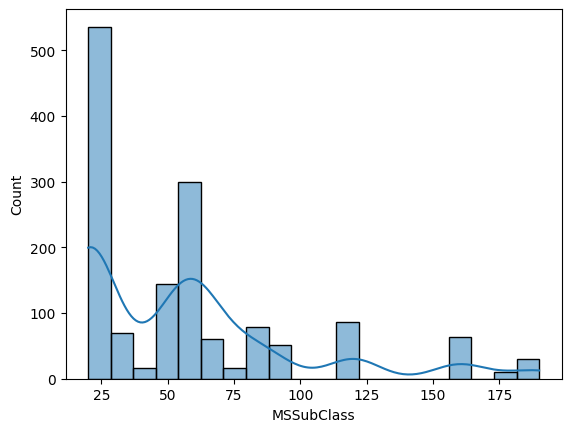

In [19]:
sns.histplot(data=df, x='MSSubClass', kde=True)

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

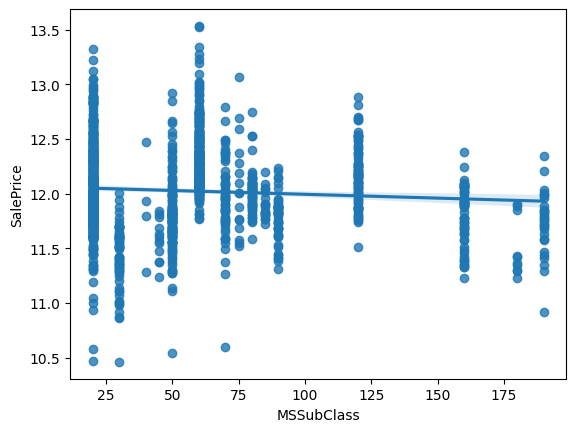

In [20]:
sns.regplot(data=df, x='MSSubClass', y='SalePrice')

There is no linear relationship between 'MSSubClass' and the target varaible(price).

In [21]:
# Calculate correlation matrix
correlation = df['MSSubClass'].corr(df['SalePrice'])
correlation

-0.07395901733239706

Btw, let's observe the correlation heatmap.

<ipython-input-22-594ed6ebade2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


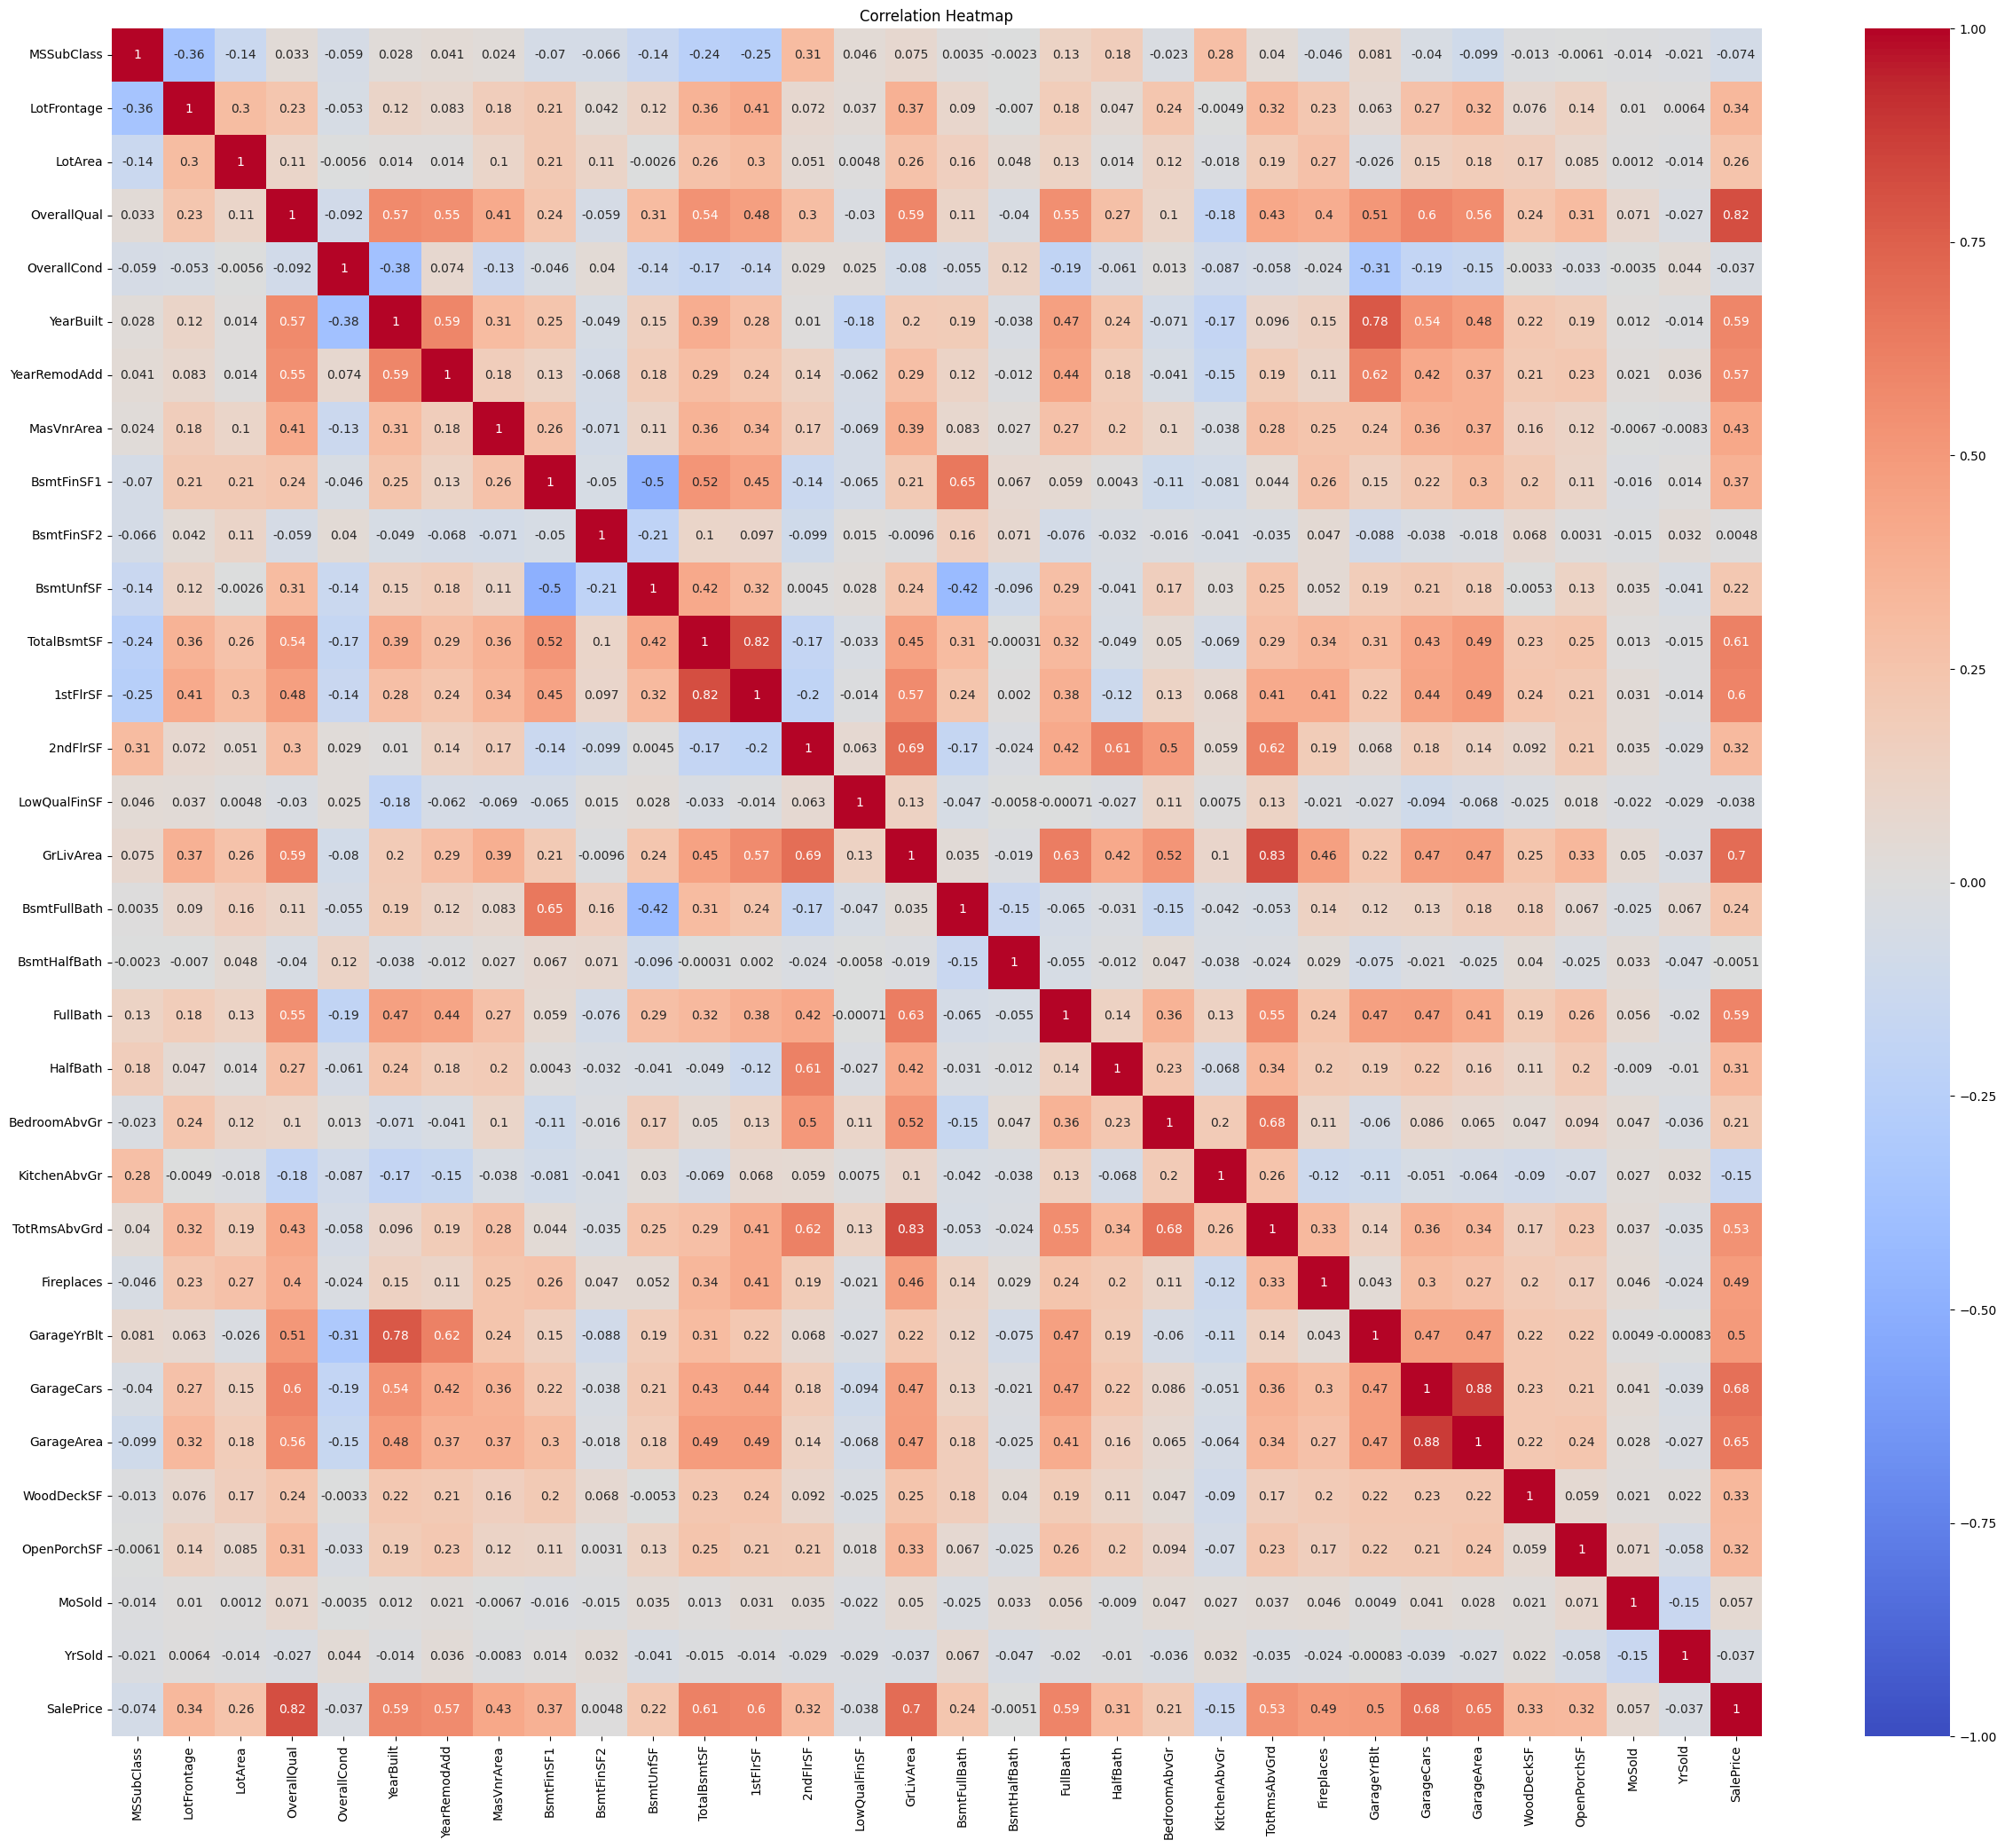

In [22]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### About 'OverallQueal'

Accoring to the correlation heatmap, sounds there is a positive linear relationship between 'OverallQual' and the 'SalePrice'. Let's visualize it.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

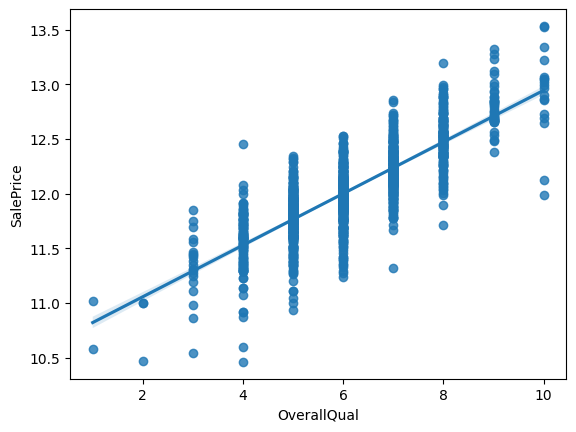

In [23]:
sns.regplot(data=df, x='OverallQual', y='SalePrice')

### Heating

<Axes: xlabel='Heating', ylabel='SalePrice'>

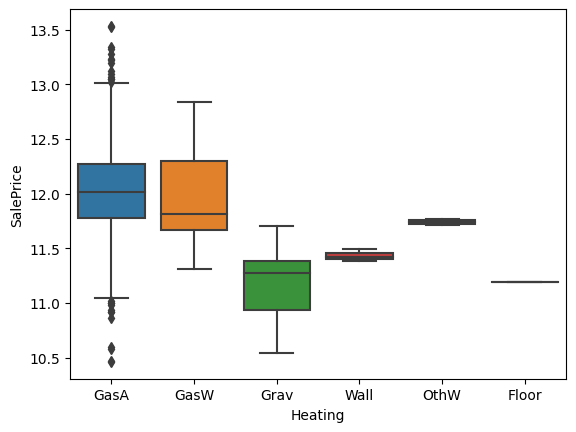

In [24]:
sns.boxplot(data=df, x='Heating', y='SalePrice')

Houses with heating types: GasA, GasW, and Wall are almost in the same range of SalePrice. While houses with other heating types have different range of prices.

<Axes: xlabel='Heating', ylabel='count'>

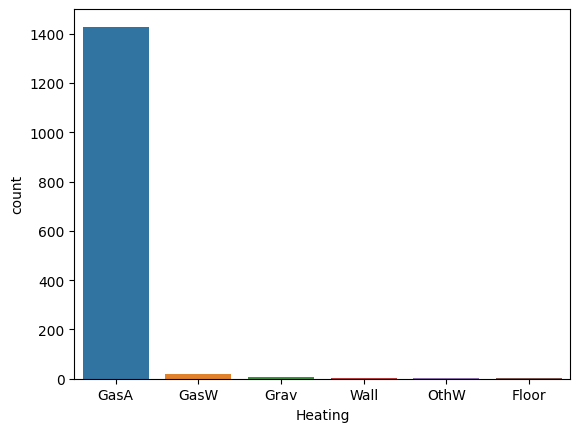

In [25]:
sns.countplot(data=df, x='Heating')

Kruskal-Wallis H to test the statistical significance of the differences in SalePrice across the categories of Heating

In [26]:
cats = df['Heating'].unique()
cols_for_each_cat = []
for cat in cats:
    heating_cat = df[df['Heating'] == cat]['SalePrice']
    cols_for_each_cat.append(heating_cat)

_, p_value = kruskal(*cols_for_each_cat)

print(p_value)

if p_value < 0.05:
    print('There are likely significant differences in SalePrice across the types of Heating.')
else:
    print('There may not be significant differences in SalePrice across the types of Heating.')

3.3312797209470924e-06
There are likely significant differences in SalePrice across the types of Heating.


Meaning that different types of Heating may cause different SalePrice of houses.

### Utilities

<Axes: xlabel='Utilities', ylabel='SalePrice'>

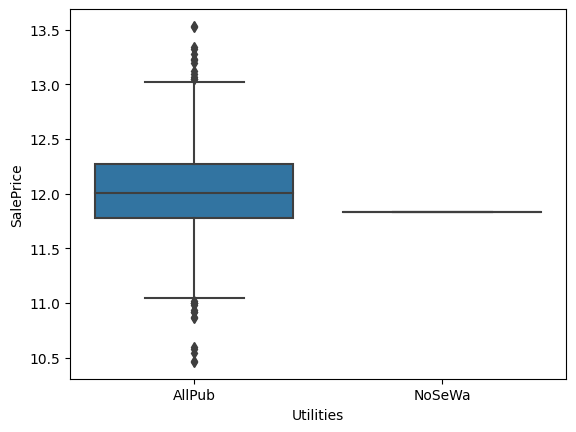

In [27]:
sns.boxplot(data=df, x='Utilities', y='SalePrice')

'Utilities' has two types and all the houses have the utilities type 'AllPub', except one house. 

Kruskal-Wallis H test

In [28]:
cats = df['Utilities'].unique()
cols_for_each_cat = []
for cat in cats:
    ut_cat = df[df['Utilities'] == cat]['SalePrice']
    cols_for_each_cat.append(ut_cat)

_, p_value = kruskal(*cols_for_each_cat)

print(p_value)

if p_value < 0.05:
    print('There are likely significant differences in SalePrice across the types of Utilities.')
else:
    print('There may not be significant differences in SalePrice across the types of Utilities.')

0.5233079667064577
There may not be significant differences in SalePrice across the types of Utilities.


### Earlier built, lower higher price?

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

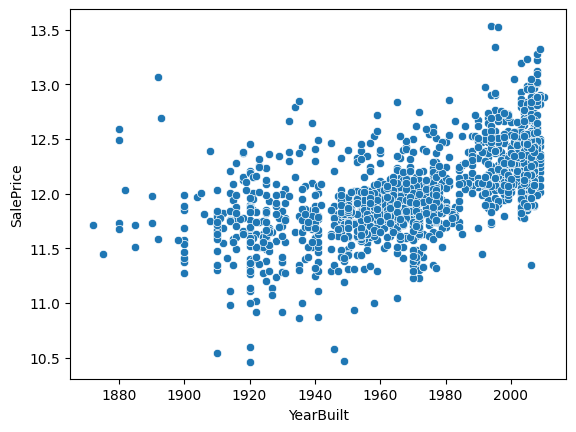

In [31]:
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')

In [38]:
X = df['YearBuilt'].array
Y = df['SalePrice'].array
result = pearsonr(X,Y)
result

PearsonRResult(statistic=0.5865702403842268, pvalue=1.1035673374161969e-135)

So the earlier built date of the house not result in the lower house price.

### Number of rooms vs. area

Correlation between number of rooms and area:  0.8254893743088427


<Axes: xlabel='TotRmsAbvGrd', ylabel='GrLivArea'>

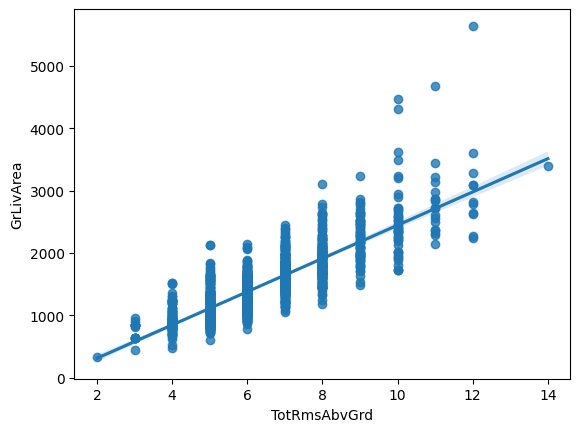

In [39]:
print("Correlation between number of rooms and area: ", df['TotRmsAbvGrd'].corr(df['GrLivArea']))
sns.regplot(data=df, x='TotRmsAbvGrd', y='GrLivArea')

There is a positive linear relationship.

### Exterior covering on house

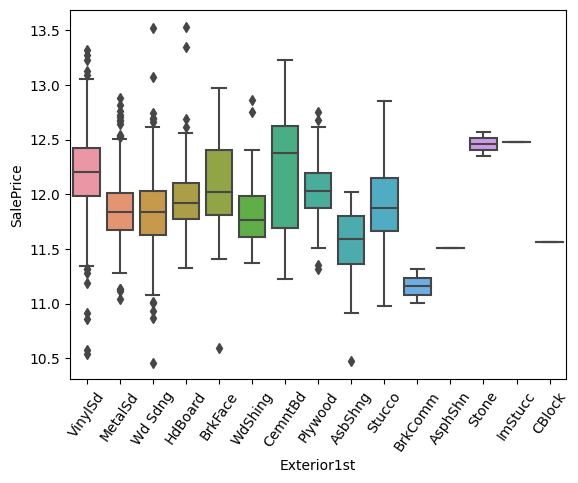

In [40]:
sns.boxplot(data=df, x='Exterior1st', y='SalePrice')
plt.xticks(rotation = 55)
plt.show()

Houses with Stone exterior coverning are the most expenssive and houses with Brick common covering are the most inexpensive! Also based ont the plot, the distributions are different.

In [33]:
cats = df['Exterior1st'].unique()
cols_for_each_cat = []
for cat in cats:
    heating_cat = df[df['Exterior1st'] == cat]['SalePrice']
    cols_for_each_cat.append(heating_cat)

_, p_value = kruskal(*cols_for_each_cat)

print(p_value)

if p_value < 0.05:
    print('There are likely significant differences in SalePrice across the types of Exterior1st.')
else:
    print('There may not be significant differences in SalePrice across the types of Exterior1st.')

1.6944856533946873e-56
There are likely significant differences in SalePrice across the types of Exterior1st.


### Neighborhood vs. SalePrice

Are houses in certain neighborhoods more expensive on average compared to others?

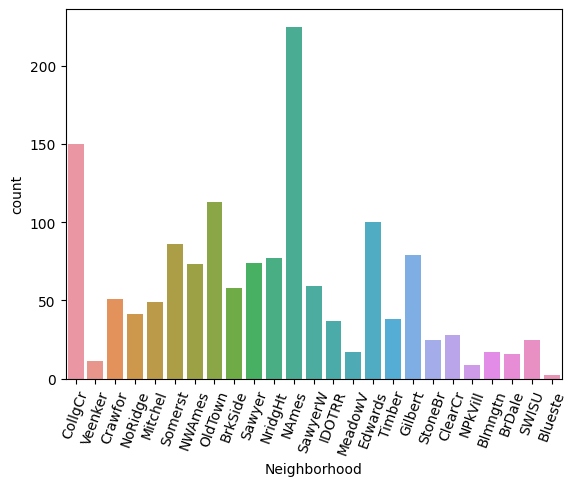

In [34]:
sns.countplot(data=df, x='Neighborhood')
plt.xticks(rotation=70)
plt.show()

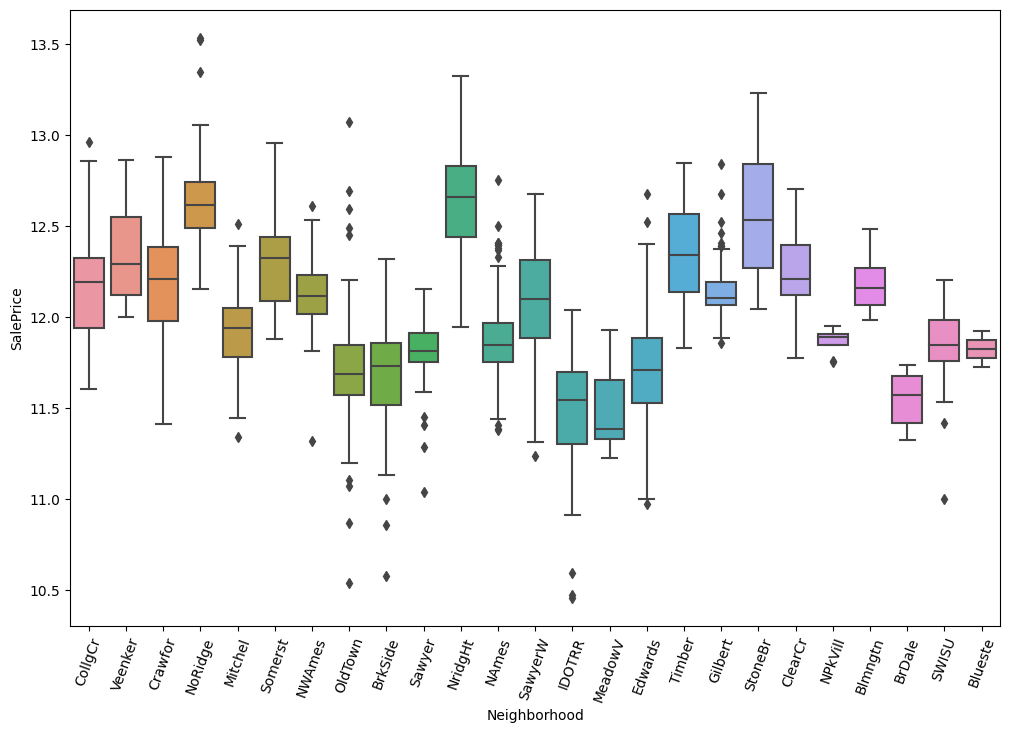

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=70)
plt.show()

The distributions are different. Also Houses located in neighborhoods Northridge and Stone Brook are more expensive.


Kruskal-Wallis H Test

In [36]:
cats = df['Neighborhood'].unique()
cols_for_each_cat = []
for cat in cats:
    nb_cat = df[df['Neighborhood'] == cat]['SalePrice']
    cols_for_each_cat.append(nb_cat)

_, p_value = kruskal(*cols_for_each_cat)

print(p_value)

if p_value < 0.05:
    print('There are likely significant differences in SalePrice across the types of Neighborhood.')
else:
    print('There may not be significant differences in SalePrice across the types of Neighborhood.')

6.696799031735812e-168
There are likely significant differences in SalePrice across the types of Neighborhood.


Meaning that some houses in certain neighborhoods are more expensive compared to others.